<a href="https://colab.research.google.com/github/dandamudi-geeta/Quantum-Computing/blob/main/2348512_QC(Lab6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.8 MB/s eta 0:00:00


In [3]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.3 MB/s eta 0:00:00


In [4]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f817c6332f70008015f25b4b897c2704edb7d9cf4befffe089225c6aeac41c8b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram

In [6]:
c = "1"
d = "0"

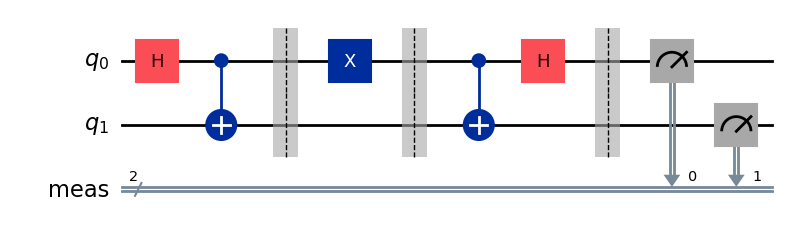

In [7]:
protocol  = QuantumCircuit(2)

#Prepating the ebit for superdense coding
protocol.h(0)
protocol.cx(0,1)
protocol.barrier()

#Alice's operations
if d=="1":
    protocol.z(0)
if c=="1":
    protocol.x(0)
protocol.barrier()

#Bob's actions
protocol.cx(0,1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw("mpl"))

Measured 10 with frequency 1.0


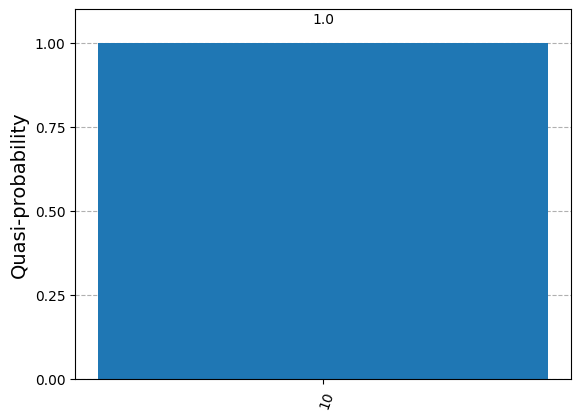

In [8]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

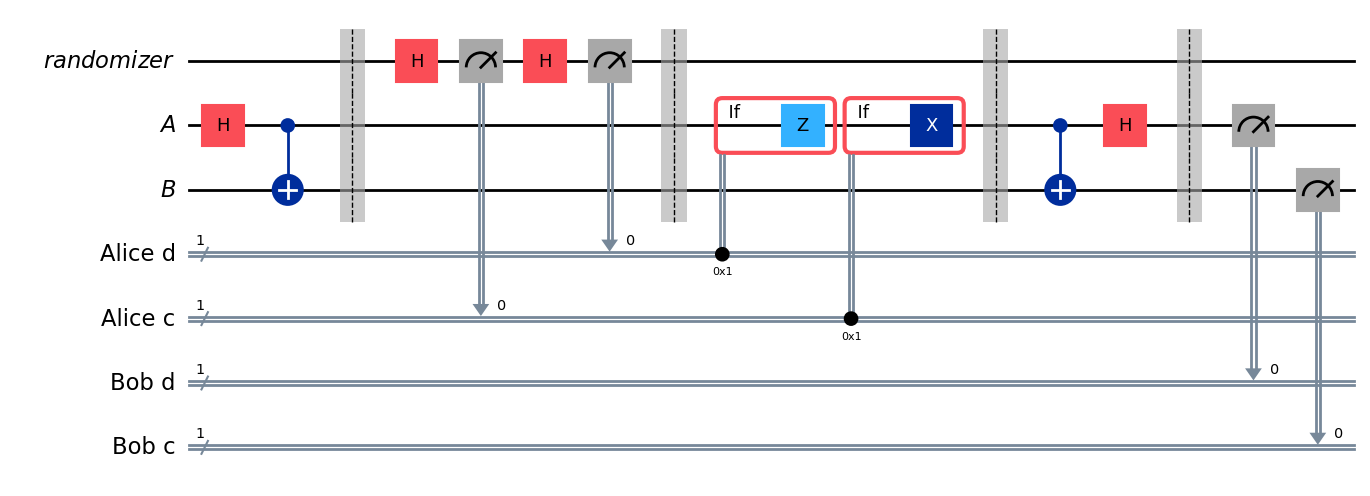

In [9]:
rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'randomizer' qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw(output='mpl'))

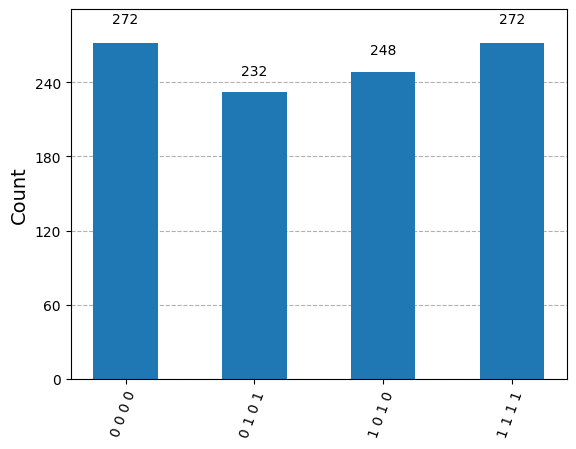

In [10]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [11]:
# Step 1: Initialize the entangled qubits for Alice and Bob
qc = QuantumCircuit(3, 2)  # qubit 0 and 1 are for Alice and Bob's entangled pair, qubit 2 is for random bit generation

# Create a Bell state between Alice (qubit 0) and Bob (qubit 1)
qc.h(0)  # Apply H gate to qubit 0
qc.cx(0, 1)  # Apply CNOT with qubit 0 as control and qubit 1 as target

In [12]:
# Step 2: Generate random bits for c and d using qubit 2
qc.h(2)  # Hadamard gate to create superposition
qc.measure(2, 0)  # Measure to get a random bit, store in classical bit 0
qc.reset(2)  # Reset qubit 2 for reuse

qc.h(2)
qc.measure(2, 1)  # Measure to get a second random bit, store in classical bit 1

In [13]:
# Step 3: Encoding the message based on the random values of c and d
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc,shots=1)
result = job.result()
random_bits = result.get_counts(qc).most_frequent()  # Extracting the most frequent measurement outcome
c, d = int(random_bits[1]), int(random_bits[0])  # Bits are extracted in reverse order from classical register

# Applying gates based on c and d
if c == 0 and d == 0:
    pass  # No gate needed if c = 0, d = 0
elif c == 0 and d == 1:
    qc.x(0)  # Apply X gate if c = 0, d = 1
elif c == 1 and d == 0:
    qc.z(0)  # Apply Z gate if c = 1, d = 0
elif c == 1 and d == 1:
    qc.z(0)
    qc.x(0)  # Apply both Z and X gates if c = 1, d = 1

In [14]:
# Step 4: Alice sends her qubit (qubit 0) to Bob

Random bits chosen by Alice (c, d): (1, 1)
Measurement results (Bob's interpretation of c and d):


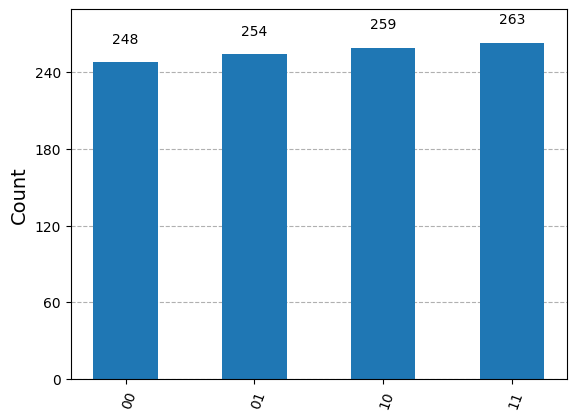

In [17]:
# Step 5: Bob decodes the message
qc.cx(0, 1)  # Apply CNOT to disentangle
qc.h(0)  # Apply H gate to decode

# Step 6: Measure to verify c and d
qc.measure([0, 1], [0, 1])  # Measure the qubits and store in classical bits

# Execute the circuit
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts(qc)

# Show the results
print(f"Random bits chosen by Alice (c, d): ({c}, {d})")
print(f"Measurement results (Bob's interpretation of c and d):")
plot_histogram(counts)

**Explanation of the Code:
Random Bit Generation:**


*   We use Python's random.randint(0, 1) to generate two random bits, c and d,representing the message Alice wants to send.
Creating Entanglement:


*   A Hadamard gate on q[1] followed by a CNOT gate between q[1] and q[2] creates an entangled pair (Bell state) shared between Alice and Bob.
Encoding the Message:

*  Based on the values of c and d:
Apply an X gate on q[1] if d = 1.
Apply a Z gate on q[1] if c = 1.
These gates encode the two classical bits c and d onto the quantum state.
Decoding:

*  Bob applies a CNOT (with q[1] as control and q[2] as target) followed by a Hadamard gate on q[1] to decode the message.
This step essentially disentangles the qubits and allows Bob to measure q[1] and q[2] to retrieve the original classical bits.
Measurement:

*  Alice and Bob's classical bits are extracted by measuring q[1] and q[2].
The output should match the bits c and d that were randomly generated.
Output and Verification
*  The result will be displayed in a histogram, showing the frequency of each possible outcome.
*  The code also prints a message confirming whether the decoded result matches the original bits (c, d), verifying that the protocol worked correctly.
This setup simulates superdense coding with random message bits, confirming that Alice and Bob's classical bits agree as expected.